# Predicting the sale price of bulldozers

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem Definition

> How well can we predict the future sale price of a bulldozer given characteristics and previous examples of how much similiar bulldozers sold for?

## 2. Data

The data for this project comes from the Kaggle competition Bluebook for Bulldozers: https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.  For more on the evaluation of this project check: https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview

**Note:** the goal for most regression evaluation metrics is to minimize the error. For example the goal of this project is to build a machine learning model that minimizes RMSLE.

## 4. Features

Kaggle provides a data dictionary detailing all the features of the dataset. You can find here: https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [4]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 3.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 32.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 29.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 55.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 10.2 MB/s eta 0:00:00


In [6]:
# Import training and validation datasets
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

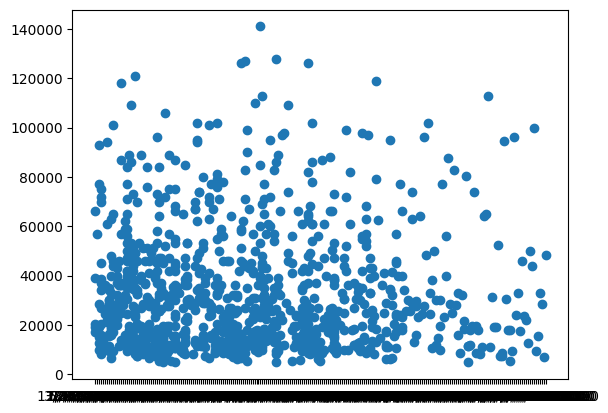

In [8]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

<Axes: ylabel='Frequency'>

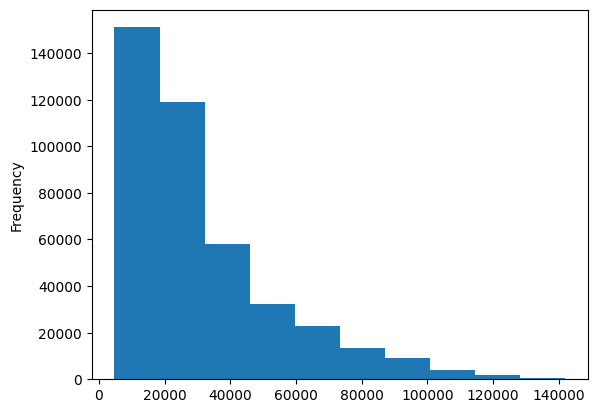

In [9]:
df.SalePrice.plot.hist()

In [11]:
# Import data again but this time parse dates
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory=False,
                 parse_dates=["saledate"])

In [14]:
df.saledate.dtype
# df.saledate[:1000]

dtype('<M8[ns]')

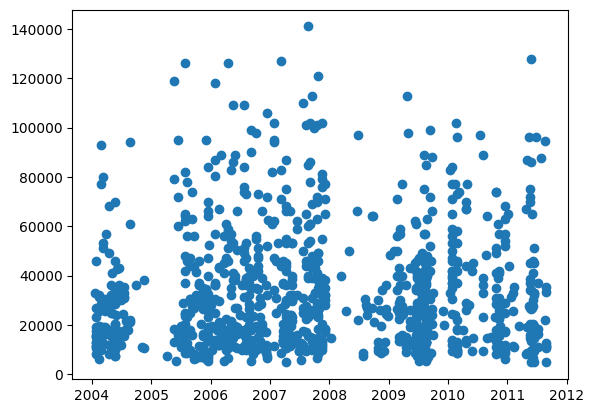

In [15]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

In [17]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sort dataframe by saledate

When working with time-series data, its a good idea to sort by date.

In [18]:
# Sort dataframe by saledate
df.sort_values(by=["saledate"],inplace=True, ascending=True)
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

# Make a copy of the original dataframe

It's a good practice to make a copy of the original dataframe so that when we're manipulating our data we still have a copy of the original.

In [19]:
df_tmp = df.copy()

In [20]:
df_tmp.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Add datetime parameters for saledate

In [21]:
df_tmp["saleYear"]=df_tmp.saledate.dt.year
df_tmp["saleMonth"]=df_tmp.saledate.dt.month
df_tmp["saleDay"]=df_tmp.saledate.dt.day
df_tmp["saleDayOfYear"]=df_tmp.saledate.dt.dayofyear
df_tmp["saleDayOfWeek"]=df_tmp.saledate.dt.dayofweek

In [23]:
df_tmp.head(5).T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [25]:
# Now we've enriched our dataframe with date parameters, we can drop 'saledate' column
df_tmp.drop("saledate",axis=1,inplace=True)

KeyError: "['saledate'] not found in axis"

In [26]:
# Check the values of different columns
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

## 5. Modeling

We've done enough EDA (we could always do more), but let's do some model driven EDA.

### Convert Strings to Categories

One way we can convert strings to numbers is by converting them into pandas categories. 

In [28]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

False

In [38]:
# Find columns which contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content.dtype):
        print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [39]:
# Turn string Columns into Categories
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content.dtype):
        df_tmp[label]=content.astype("category").cat.as_ordered()

In [40]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [43]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Thanks to pandas categories, we now have a way to access all our data as numbers.

However, we still have a bunch of missing data.

In [45]:
(df_tmp.isnull().sum()/len(df_tmp)).sort_values(ascending=False)

Blade_Width                 0.937041
Engine_Horsepower           0.937041
Tip_Control                 0.937041
Pushblock                   0.937041
Blade_Extension             0.937041
Enclosure_Type              0.937041
Scarifier                   0.937014
Hydraulics_Flow             0.891264
Grouser_Tracks              0.891264
Coupler_System              0.891024
fiModelSeries               0.857845
Steering_Controls           0.826697
Differential_Type           0.826595
UsageBand                   0.821492
fiModelDescriptor           0.818715
Backhoe_Mounting            0.804428
Stick                       0.803498
Turbocharged                0.803498
Pad_Type                    0.803498
Blade_Type                  0.801610
Travel_Controls             0.801606
Tire_Size                   0.763415
Track_Type                  0.752378
Grouser_Type                0.752378
Stick_Length                0.752213
Pattern_Changer             0.752213
Thumb                       0.752041
U

### Save preprocessed data

In [46]:
# Export current tmp dataframe
df_tmp.to_csv("data/bluebook-for-bulldozers/train_tmp.csv", index=False)

In [47]:
# Import preprocessed data
df_tmp= pd.read_csv("data/bluebook-for-bulldozers/train_tmp.csv",
                    low_memory = False)
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [48]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Fill missing values

### Fill numerical missing values first

In [50]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content.dtype):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfYear
saleDayOfWeek


In [51]:
# Check for which numeric columns have null values
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content.dtype):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [52]:
# Fill numeric columns with nulls with the median value
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content.dtype):
        if pd.isnull(content).sum():
            # add a binary column which tells us if the data was missing or not
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # fill missing numeric values with the median
            df_tmp[label] = df_tmp[label].fillna(content.median())

In [53]:
# Demonstrate how median is more robust than mean
hundreds = np.full((1000,),100)
hundreds_billion = np.append(hundreds,1000000000)
np.mean(hundreds),np.mean(hundreds_billion),np.median(hundreds),np.median(hundreds_billion)

(100.0, 999100.8991008991, 100.0, 100.0)

In [54]:
# recheck for numeric null values
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content.dtype):
        if pd.isnull(content).sum():
            print(label)

In [56]:
# check how many values were missing from auctioneer column
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [59]:
# check for columns which aren't numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content.dtype):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [62]:
pd.Categorical(df_tmp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [65]:
# Turn categorical data into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content.dtype):
        # add binary column to indicate whether column had missing value
        df_tmp[label+"_is_missing"]=pd.isna(content)
        df_tmp[label]=pd.Categorical(content).codes + 1

In [66]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [67]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [70]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

Now that all our data is numeric as well as has no missing values, we should now be able to fit a machine learning model.

## Splitting Data Into Train Validation Sets

In [74]:
df_tmp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [75]:
# split data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val),len(df_train)

(11573, 401125)

In [76]:
# split data into X and y
X_train, y_train = df_train.drop("SalePrice",axis=1), df_train["SalePrice"]
X_valid, y_valid = df_val.drop("SalePrice",axis=1), df_val["SalePrice"]

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [79]:
y_valid

401125    46173.2
401126    66000.0
401127    26800.0
401128    42100.0
401129    62100.0
           ...   
412693    16000.0
412694     6000.0
412695    16000.0
412696    55000.0
412697    34000.0
Name: SalePrice, Length: 11573, dtype: float64

### Building an Evaluation Function

In [84]:
# create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    '''
        Calculates the root mean squared log error between predictions and true labels
    '''
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE":mean_absolute_error(y_train,train_preds),
              "Valid MAE": mean_absolute_error(y_valid,val_preds),
              "Training RMSLE":rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds),

              }
    return scores

### Testing our model on a subset (to tune the hyperparameters)

In [82]:
%%time

# Let's build a machine learning model and change max sample value
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

model.fit(X_train,y_train)

CPU times: user 19.5 s, sys: 150 ms, total: 19.7 s
Wall time: 2.04 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [85]:
# score the model
show_scores(model)

{'Training MAE': 5561.138281258958,
 'Valid MAE': 7171.251002333016,
 'Training RMSLE': 0.2577410303930966,
 'Valid RMSLE': 0.2930925556053619,
 'Training R^2': 0.860649958144041,
 'Valid R^2': 0.832162894701184}

In [87]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {
    "n_estimators" : np.arange(10,100,10),
    "max_depth" : [None, 3, 5, 10],
    "min_samples_split" : np.arange(2,20,2),
    "min_samples_leaf": np.arange(1,20,2),
    "max_features": [0.5,1,"sqrt","auto"],
    "max_samples": [10000]
}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions= rf_grid,
                              n_iter=5,
                              cv=5,
                              verbose=True)

# fit the RandomizedSearchCV model
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: user 7.9 s, sys: 1.08 s, total: 8.98 s
Wall time: 10.9 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [88]:
# find the best model params
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 10,
 'min_samples_leaf': 7,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 10}

In [89]:
# Evaluate the RandomizedSearchCV model
show_scores(rs_model)

{'Training MAE': 7067.925127400778,
 'Valid MAE': 8257.976904122454,
 'Training RMSLE': 0.31351461805366937,
 'Valid RMSLE': 0.3335890867850565,
 'Training R^2': 0.7868775190387691,
 'Valid R^2': 0.7873794664008933}

### Train a model with the best hyperparameters

**Note:** These were found after 100 iterations of `RandomizedSearchCV`

In [91]:
%%time

# Instantiate most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                 min_samples_leaf=1,
                                 min_samples_split=14,
                                 max_features=0.5,
                                 n_jobs=-1,
                                 max_samples=None,
                                 # random_state=42) # make experiment reproducible

# Fit the most ideal model
ideal_model.fit(X_train,y_train)

CPU times: user 1min 40s, sys: 275 ms, total: 1min 40s
Wall time: 9.8 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [92]:
# show scores for ideal model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 2955.1867710559322,
 'Valid MAE': 5948.037477479286,
 'Training RMSLE': 0.14460690111664423,
 'Valid RMSLE': 0.24568245627817994,
 'Training R^2': 0.9588063409846915,
 'Valid R^2': 0.8812866320781434}

In [93]:
# show scores on rs_model (only trained on ~10000 samples)
show_scores(rs_model)

{'Training MAE': 7067.925127400778,
 'Valid MAE': 8257.976904122454,
 'Training RMSLE': 0.31351461805366937,
 'Valid RMSLE': 0.3335890867850565,
 'Training R^2': 0.786877519038769,
 'Valid R^2': 0.7873794664008933}

## Make predictions on test data

In [102]:
# Import the test data
df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv",
                      low_memory=False,
                      parse_dates=["saledate"])
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1999,1000,2004,2006,2005
MachineHoursCurrentMeter,3688.0,28555.0,6038.0,8940.0,2286.0
UsageBand,Low,High,Medium,High,Low
saledate,2012-05-03 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00
fiModelDesc,580G,936,EC210BLC,330CL,650K


### Preprocessing the test dataset (to get in the same format as our train dataset)

In [97]:
def preprocessdata(df):
    """
    Performs transformations on df and returns transformed df
    """
    df["saleYear"]=df.saledate.dt.year
    df["saleMonth"]=df.saledate.dt.month
    df["saleDay"]=df.saledate.dt.day
    df["saleDayOfYear"]=df.saledate.dt.dayofyear
    df["saleDayOfWeek"]=df.saledate.dt.dayofweek

    df.drop("saledate",axis=1, inplace=True)

    # Fill numeric columns with nulls with the median value
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content.dtype):
            if pd.isnull(content).sum():
                # add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # fill missing numeric values with the median
                df[label] = df[label].fillna(content.median())
                
        # fill categorical missing data and turned into numbers
        if not pd.api.types.is_numeric_dtype(content.dtype):
            df[label+"_is_missing"] = pd.isnull(content)
            # +1 because pandas fills missing categorical data with -1
            df[label]=pd.Categorical(content).codes+1
    return df

In [103]:
# Process the test data
df_test = preprocessdata(df_test)

In [105]:
df_test.head(5).T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,False
Blade_Type_is_missing,True,True,True,True,False
Travel_Controls_is_missing,True,True,True,True,False
Differential_Type_is_missing,True,False,True,True,True


In [111]:
len(X_train.columns)

102

In [106]:
# we can find how the validation and training sets differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [107]:
# Manually insert auctioneerID_is_missing column
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Finally now our test dataframe has the same columns as our training dataframe. Now we can make predictions!

In [112]:
# make sure order df_test columns is the same as X_train
df_test = df_test[list(X_train.columns)]

In [113]:
# Make predictions on test dataset
test_preds=ideal_model.predict(df_test)

In [114]:
test_preds

array([17647.84718248, 18037.63418271, 53896.94443677, ...,
       14055.03484039, 18406.33734997, 28799.03117355])

We've made some predictions but they're not in the same format that Kaggle is asking for.

In [115]:
# format predictions into format Kaggle requests
df_preds = pd.DataFrame()
df_preds["SalesID"]=df_test["SalesID"]
df_preds["SalesPrice"]=test_preds
df_preds

,SalesID,SalesPrice
0,1227829,17647.847182
1,1227844,18037.634183
2,1227847,53896.944437
3,1227848,65451.532211
4,1227863,53557.562213
...,...,...
12452,6643171,45855.150226
12453,6643173,13602.919302
12454,6643184,14055.034840
12455,6643186,18406.337350


In [116]:
# export predictions to csv
df_preds.to_csv("data/bluebook-for-bulldozers/test_predictions.csv", index=False)

### Feature Importance

Feature Importance seeks to determine what features were most important in predicting the ***target value*** for our model (in our case SalesPrice)

In [117]:
ideal_model.feature_importances_

array([3.27537769e-02, 2.04039208e-02, 4.05326246e-02, 1.70801183e-03,
       3.28140013e-03, 1.96918071e-01, 3.35991425e-03, 1.06423222e-03,
       4.74017872e-02, 4.28856115e-02, 7.08928554e-02, 5.00324010e-03,
       2.00873630e-02, 1.54011478e-01, 3.54500089e-02, 5.89835331e-03,
       1.17225403e-03, 4.07619881e-03, 3.89136761e-03, 5.90476092e-02,
       3.73334900e-04, 1.35640866e-04, 1.70900648e-03, 2.91702141e-04,
       7.92496846e-04, 2.93610288e-04, 1.93466422e-04, 5.10509979e-03,
       2.92247571e-03, 2.08798596e-03, 2.35215518e-03, 3.32264606e-03,
       5.28726922e-03, 4.88883882e-04, 4.56213685e-03, 1.18203513e-02,
       9.80414968e-04, 1.02468921e-02, 4.23032158e-03, 2.80588324e-03,
       1.29052785e-03, 9.50333102e-04, 2.32514035e-03, 6.60085315e-04,
       4.34837987e-04, 3.70698103e-04, 1.66082452e-03, 1.98801810e-03,
       8.69752589e-04, 2.08772067e-04, 1.10250951e-03, 7.28097079e-02,
       3.74750362e-03, 5.66138598e-03, 9.90859895e-03, 2.95530118e-03,
      

In [120]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))

    # plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()

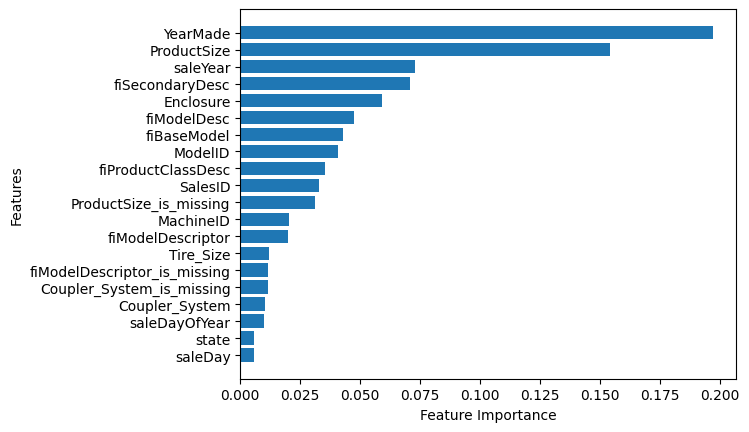

In [121]:
plot_features(X_train.columns,ideal_model.feature_importances_)

In [127]:
df["ProductSize"].value_counts()

ProductSize
Medium            64342
Large / Medium    51297
Small             27057
Mini              25721
Large             21396
Compact            6280
Name: count, dtype: int64

**Question to finish:** Why might knowing the feature importances of a trained machine learning model be helpful?